<a href="https://colab.research.google.com/github/TAUforPython/Graph-MachineLearning/blob/main/Gromov-Wasserstein%20distance%20Transport%20Task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:

import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist, squareform
from scipy.optimize import minimize
from sklearn.cluster import SpectralClustering
import warnings
warnings.filterwarnings('ignore')

=== Gromov-Wasserstein Distance Demonstration ===
Graph 1 shape: (6, 2)
Graph 2 shape: (6, 2)
Gromov-Wasserstein distance: 3.5695


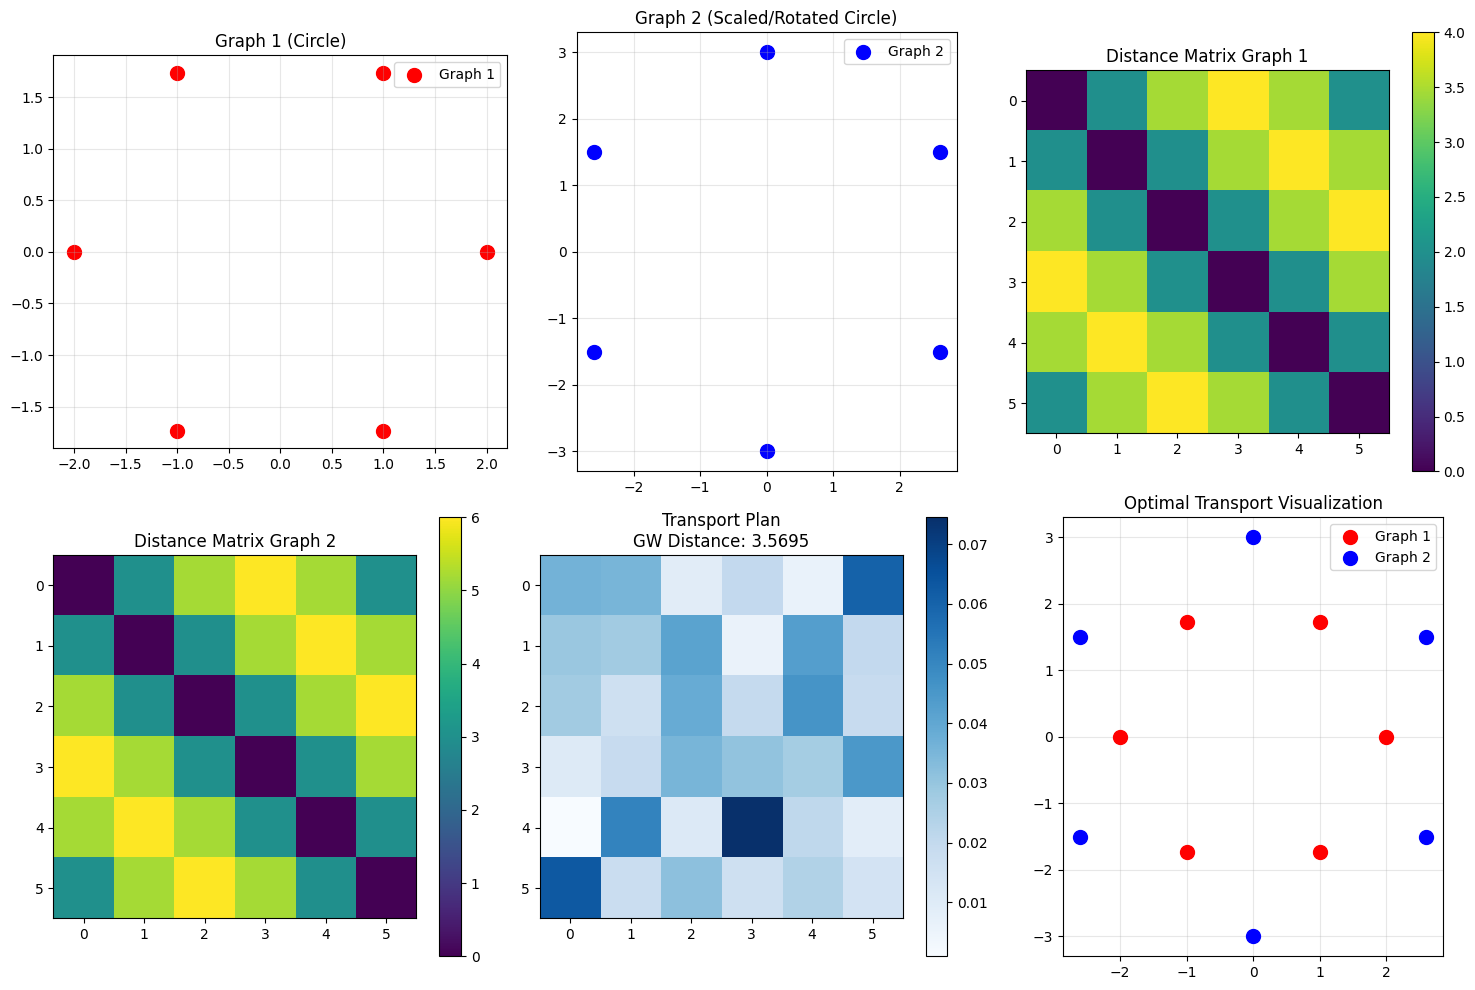


=== Linear Graphs GW Distance ===


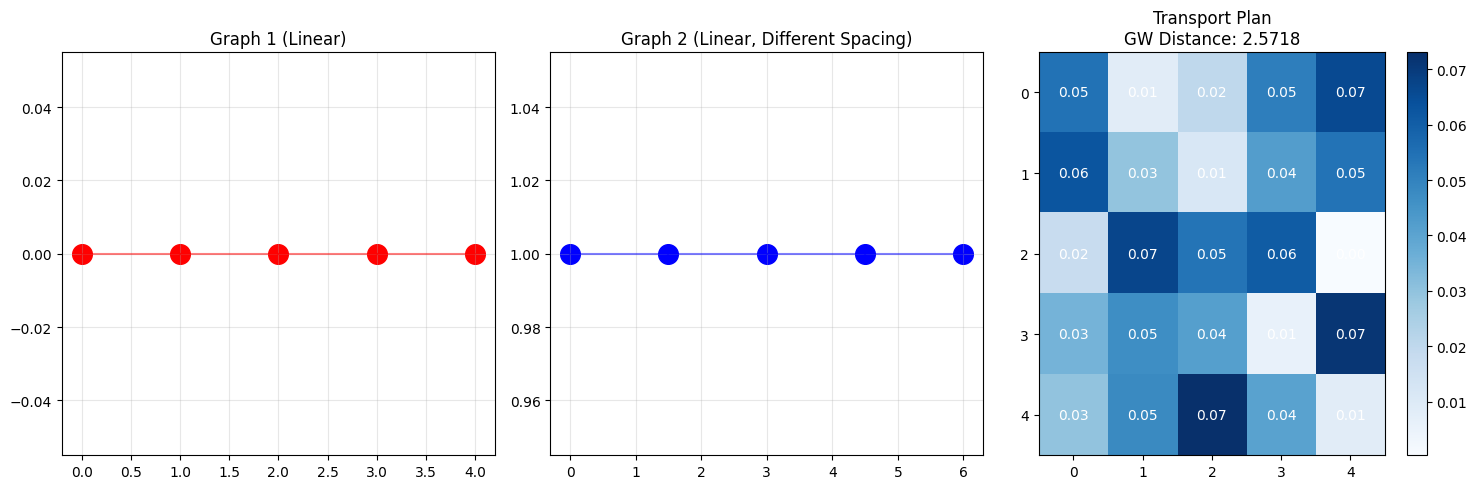


=== Spectral Clustering with GW Concepts ===


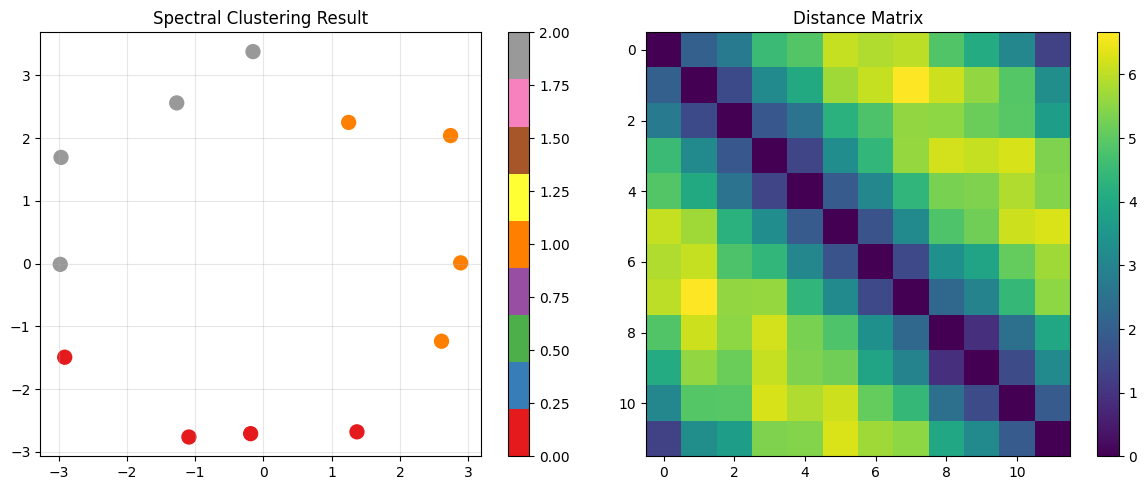

Cluster assignments: [1 1 1 2 2 2 2 0 0 0 0 1]
Cluster 0: nodes [7, 8, 9, 10]
Cluster 1: nodes [0, 1, 2, 11]
Cluster 2: nodes [3, 4, 5, 6]


In [8]:


def create_simple_graphs():
    """Create simple synthetic graphs to demonstrate Gromov-Wasserstein distance"""

    # Graph 1: Simple circle pattern
    n1 = 6
    angles1 = np.linspace(0, 2*np.pi, n1, endpoint=False)
    x1 = np.cos(angles1) * 2
    y1 = np.sin(angles1) * 2
    graph1_pos = np.column_stack([x1, y1])

    # Graph 2: Different circle pattern (scaled and rotated)
    n2 = 6
    angles2 = np.linspace(0, 2*np.pi, n2, endpoint=False) + np.pi/6  # rotated
    x2 = np.cos(angles2) * 3  # scaled
    y2 = np.sin(angles2) * 3  # scaled
    graph2_pos = np.column_stack([x2, y2])

    return graph1_pos, graph2_pos

def compute_distance_matrix(X):
    """Compute distance matrix for a set of points"""
    return squareform(pdist(X))

def compute_gromov_wasserstein_distance(C1, C2, p=2, max_iter=100):
    """
    Compute the Gromov-Wasserstein distance between two structures.
    This is a simplified implementation for demonstration purposes.
    """
    n1, n2 = C1.shape[0], C2.shape[0]

    # Initialize uniform distributions
    a = np.ones(n1) / n1
    b = np.ones(n2) / n2

    # Cost matrix for GW distance
    def gw_cost(T):
        cost = 0
        for i in range(n1):
            for j in range(n2):
                for k in range(n1):
                    for l in range(n2):
                        # Cost based on distance differences
                        dist_diff = (C1[i, k] - C2[j, l])**2
                        cost += T[i, j] * T[k, l] * dist_diff
        return cost / 2  # Normalize

    # Use a simple iterative approach for demonstration
    # Initialize transport plan (random, then normalized)
    T = np.random.rand(n1, n2)
    T = T / T.sum()

    # Normalize rows and columns to match marginal distributions
    for _ in range(max_iter):
        # Normalize rows
        row_sums = T.sum(axis=1)
        T = T / row_sums[:, np.newaxis]
        T = T * a[:, np.newaxis]

        # Normalize columns
        col_sums = T.sum(axis=0)
        T = T / col_sums[np.newaxis, :]
        T = T * b[np.newaxis, :]

    # Calculate final cost
    final_cost = gw_cost(T)
    return final_cost, T

def visualize_gw_example():
    """Visualize the Gromov-Wasserstein example"""
    # Create simple graphs
    graph1_pos, graph2_pos = create_simple_graphs()

    # Compute distance matrices
    C1 = compute_distance_matrix(graph1_pos)
    C2 = compute_distance_matrix(graph2_pos)

    print(f"Graph 1 shape: {graph1_pos.shape}")
    print(f"Graph 2 shape: {graph2_pos.shape}")

    # Compute Gromov-Wasserstein distance
    gw_dist, transport_plan = compute_gromov_wasserstein_distance(C1, C2)
    print(f"Gromov-Wasserstein distance: {gw_dist:.4f}")

    # Create subplots
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))

    # Plot 1: Graph 1
    axes[0, 0].scatter(graph1_pos[:, 0], graph1_pos[:, 1], c='red', s=100, label='Graph 1')
    axes[0, 0].set_title('Graph 1 (Circle)')
    axes[0, 0].grid(True, alpha=0.3)
    axes[0, 0].set_aspect('equal')
    axes[0, 0].legend()

    # Plot 2: Graph 2
    axes[0, 1].scatter(graph2_pos[:, 0], graph2_pos[:, 1], c='blue', s=100, label='Graph 2')
    axes[0, 1].set_title('Graph 2 (Scaled/Rotated Circle)')
    axes[0, 1].grid(True, alpha=0.3)
    axes[0, 1].set_aspect('equal')
    axes[0, 1].legend()

    # Plot 3: Distance matrices
    im1 = axes[0, 2].imshow(C1, cmap='viridis')
    axes[0, 2].set_title('Distance Matrix Graph 1')
    plt.colorbar(im1, ax=axes[0, 2])

    # Plot 4: Distance matrix 2
    im2 = axes[1, 0].imshow(C2, cmap='viridis')
    axes[1, 0].set_title('Distance Matrix Graph 2')
    plt.colorbar(im2, ax=axes[1, 0])

    # Plot 5: Transport plan
    im3 = axes[1, 1].imshow(transport_plan, cmap='Blues')
    axes[1, 1].set_title(f'Transport Plan\nGW Distance: {gw_dist:.4f}')
    plt.colorbar(im3, ax=axes[1, 1])

    # Plot 6: Matching visualization
    axes[1, 2].scatter(graph1_pos[:, 0], graph1_pos[:, 1], c='red', s=100, label='Graph 1', zorder=2)
    axes[1, 2].scatter(graph2_pos[:, 0], graph2_pos[:, 1], c='blue', s=100, label='Graph 2', zorder=2)

    # Draw connections based on transport plan
    for i in range(len(graph1_pos)):
        for j in range(len(graph2_pos)):
            if transport_plan[i, j] > 0.1:  # Only draw significant connections
                axes[1, 2].plot([graph1_pos[i, 0], graph2_pos[j, 0]],
                               [graph1_pos[i, 1], graph2_pos[j, 1]],
                               'k--', alpha=transport_plan[i, j], zorder=1)

    axes[1, 2].set_title('Optimal Transport Visualization')
    axes[1, 2].legend()
    axes[1, 2].grid(True, alpha=0.3)
    axes[1, 2].set_aspect('equal')

    plt.tight_layout()
    plt.show()

def create_linear_graphs():
    """Create linear graphs to demonstrate GW distance"""
    # Graph 1: Linear arrangement
    n1 = 5
    graph1_pos = np.column_stack([np.arange(n1), np.zeros(n1)])

    # Graph 2: Another linear arrangement (different spacing)
    n2 = 5
    graph2_pos = np.column_stack([np.arange(n2) * 1.5, np.ones(n2)])

    return graph1_pos, graph2_pos

def visualize_linear_gw():
    """Visualize GW distance on linear graphs"""
    # Create linear graphs
    graph1_pos, graph2_pos = create_linear_graphs()

    # Compute distance matrices
    C1 = compute_distance_matrix(graph1_pos)
    C2 = compute_distance_matrix(graph2_pos)

    # Compute Gromov-Wasserstein distance
    gw_dist, transport_plan = compute_gromov_wasserstein_distance(C1, C2)

    # Visualization
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 3, 1)
    plt.scatter(graph1_pos[:, 0], graph1_pos[:, 1], c='red', s=200)
    for i in range(len(graph1_pos)-1):
        plt.plot([graph1_pos[i, 0], graph1_pos[i+1, 0]],
                [graph1_pos[i, 1], graph1_pos[i+1, 1]], 'r-', alpha=0.5)
    plt.title('Graph 1 (Linear)')
    plt.grid(True, alpha=0.3)

    plt.subplot(1, 3, 2)
    plt.scatter(graph2_pos[:, 0], graph2_pos[:, 1], c='blue', s=200)
    for i in range(len(graph2_pos)-1):
        plt.plot([graph2_pos[i, 0], graph2_pos[i+1, 0]],
                [graph2_pos[i, 1], graph2_pos[i+1, 1]], 'b-', alpha=0.5)
    plt.title('Graph 2 (Linear, Different Spacing)')
    plt.grid(True, alpha=0.3)

    plt.subplot(1, 3, 3)
    plt.imshow(transport_plan, cmap='Blues', aspect='auto')
    plt.title(f'Transport Plan\nGW Distance: {gw_dist:.4f}')
    plt.colorbar()
    for i in range(transport_plan.shape[0]):
        for j in range(transport_plan.shape[1]):
            plt.text(j, i, f'{transport_plan[i, j]:.2f}',
                    ha='center', va='center', color='white' if transport_plan[i, j] < 0.5 else 'black')

    plt.tight_layout()
    plt.show()

def demonstrate_spectral_clustering_with_gw():
    """Demonstrate spectral clustering using GW distance concepts"""
    # Create a more complex example
    n = 12
    # Create a ring-like structure
    angles = np.linspace(0, 2*np.pi, n, endpoint=False)
    x = np.cos(angles) * 3
    y = np.sin(angles) * 3
    positions = np.column_stack([x, y])

    # Add some noise to make it more interesting
    positions += np.random.normal(0, 0.2, positions.shape)

    # Compute distance matrix
    C = compute_distance_matrix(positions)

    # Create similarity matrix from distance
    sigma = np.median(C[C > 0])
    similarity = np.exp(-C**2 / (2 * sigma**2))

    # Perform spectral clustering
    n_clusters = 3
    clustering = SpectralClustering(n_clusters=n_clusters, affinity='precomputed', random_state=42)
    labels = clustering.fit_predict(similarity)

    # Visualize
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    scatter = plt.scatter(positions[:, 0], positions[:, 1], c=labels, cmap='Set1', s=100)
    plt.title('Spectral Clustering Result')
    plt.colorbar(scatter)
    plt.grid(True, alpha=0.3)

    plt.subplot(1, 2, 2)
    plt.imshow(C, cmap='viridis')
    plt.title('Distance Matrix')
    plt.colorbar()

    plt.tight_layout()
    plt.show()

    print(f"Cluster assignments: {labels}")
    for i in range(n_clusters):
        cluster_nodes = np.where(labels == i)[0]
        print(f"Cluster {i}: nodes {cluster_nodes.tolist()}")

# Run the demonstrations
print("=== Gromov-Wasserstein Distance Demonstration ===")
visualize_gw_example()

print("\n=== Linear Graphs GW Distance ===")
visualize_linear_gw()

print("\n=== Spectral Clustering with GW Concepts ===")
demonstrate_spectral_clustering_with_gw()

# few simple example


=== GROMOV-WASSERSTEIN DISTANCE AND TRANSPORT PLAN EXPLANATION ===
=== Why We Need Transport Plans ===

1. STRUCTURAL MATCHING:
   - In graphs/networks, we don't just want to match nodes based on positions
   - We want to preserve structural relationships between nodes
   - Transport plan ensures that if nodes A and B are close in graph 1,
     their corresponding nodes in graph 2 should also be close

2. OPTIMAL ASSIGNMENT:
   - Direct matching might pair nodes that are far apart structurally
   - Transport plan finds the best structural alignment
   - It balances spatial and structural similarity

3. ROBUST COMPARISON:
   - Works even when graphs have different numbers of nodes
   - Handles different graph structures and topologies
   - Provides meaningful distance measure between graphs

=== How GW Works for Transport Tasks ===

1. STRUCTURAL PRESERVATION:
   - GW distance minimizes the difference in structures
   - Ensures that relationships are preserved during matching

2. TRANSP

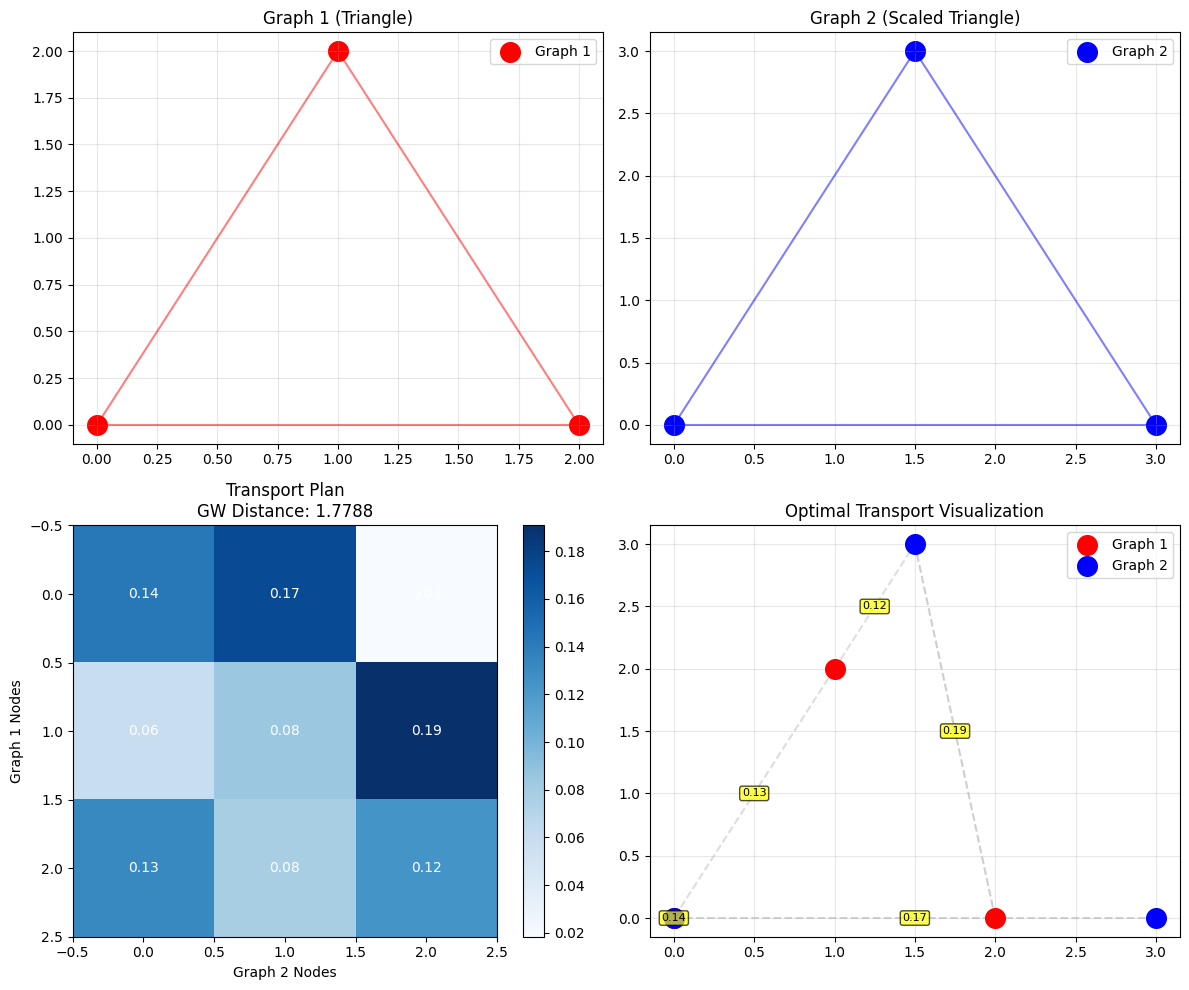


=== Applying GW to Real Data ===


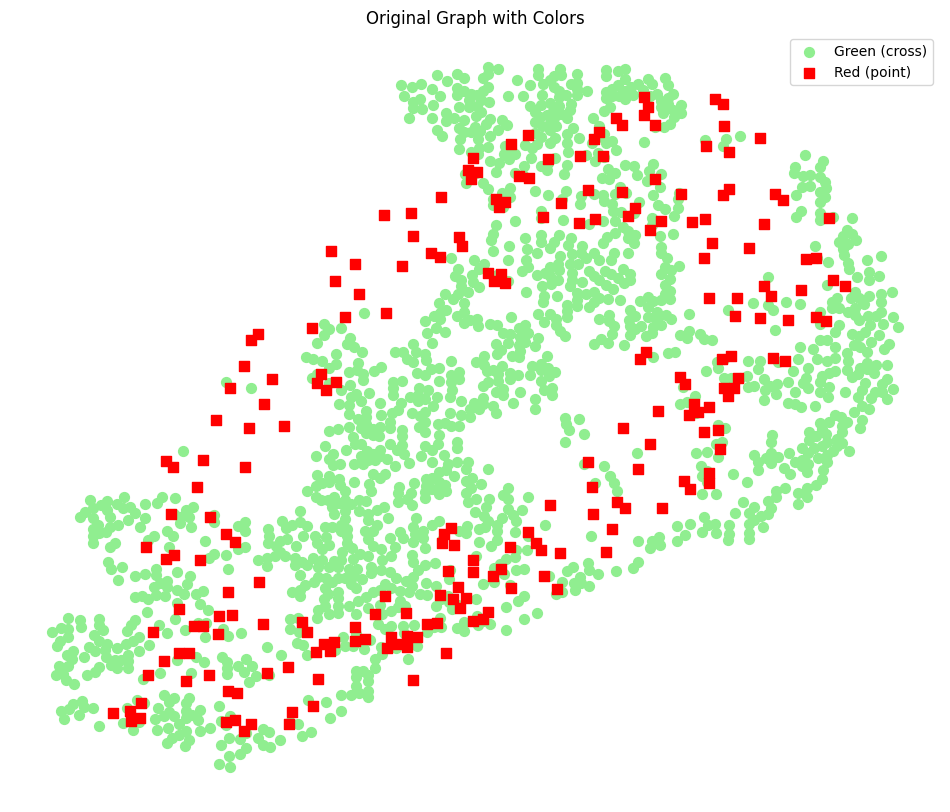

Red nodes: 227, Green nodes: 1445
Red subgraph: (227, 227), Green subgraph: (1445, 1445)
Using subset for demonstration (original data is large)
Gromov-Wasserstein distance between red and green structures: 319777.6782


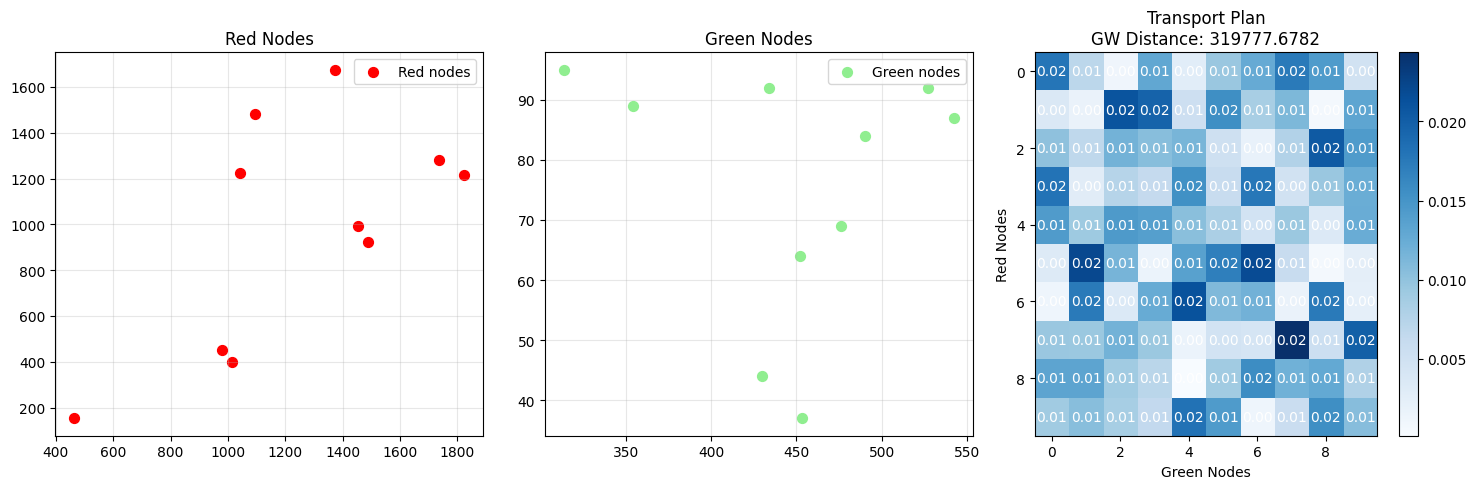


=== Spectral Clustering with GW-inspired Distance ===


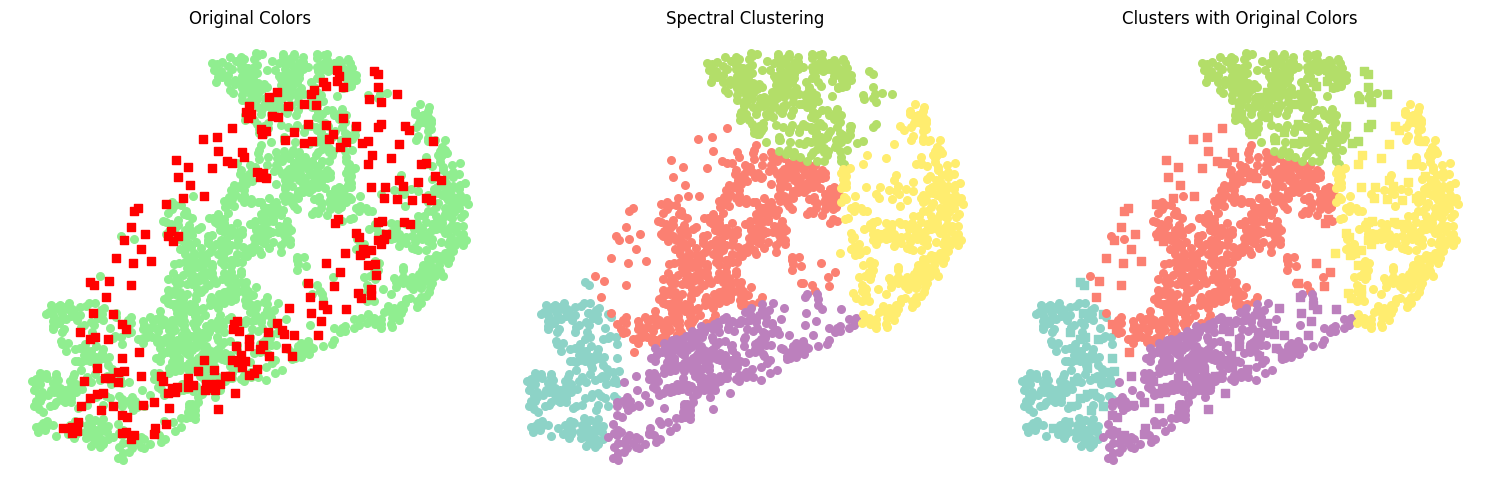

Number of clusters: 5
Cluster 0: 210 nodes (183 green, 27 red)
Cluster 1: 510 nodes (465 green, 45 red)
Cluster 2: 307 nodes (263 green, 44 red)
Cluster 3: 326 nodes (258 green, 68 red)
Cluster 4: 319 nodes (276 green, 43 red)


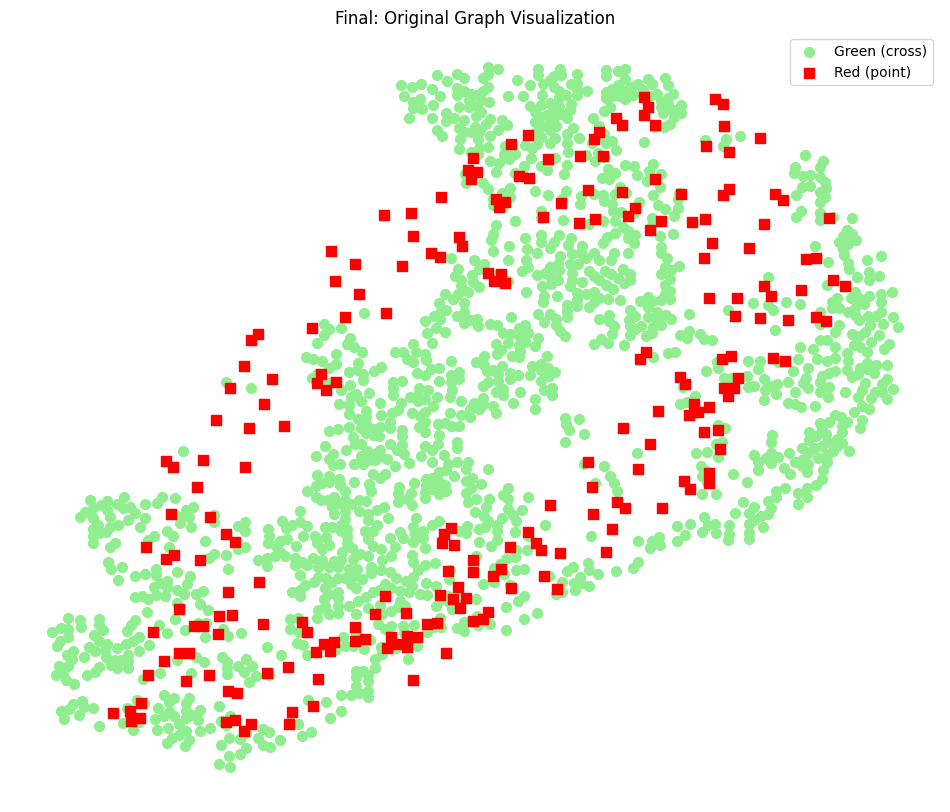

In [10]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist, squareform
from scipy.optimize import minimize
from sklearn.cluster import SpectralClustering
from sklearn.metrics import pairwise_distances
import warnings
warnings.filterwarnings('ignore')

def load_and_create_graph():
    """Load data and create graph"""
    df = pd.read_csv('df_red_green_overlay.csv')

    # Create graph
    G = nx.Graph()

    # Add nodes with attributes
    for idx, row in df.iterrows():
        G.add_node(idx,
                  pos=(row['X'], row['Y']),
                  color=row['Color'],
                  type=row['Type'],
                  x=row['X'],
                  y=row['Y'])

    return G, df

def compute_distance_matrix(G):
    """Compute distance matrix based on node positions"""
    nodes = list(G.nodes())
    n = len(nodes)
    pos_matrix = np.array([[G.nodes[node]['x'], G.nodes[node]['y']] for node in nodes])
    dist_matrix = squareform(pdist(pos_matrix))
    return dist_matrix, nodes

def visualize_graph_with_colors(G, title="Graph Visualization"):
    """Visualize the graph with node colors"""
    pos = nx.get_node_attributes(G, 'pos')

    plt.figure(figsize=(12, 10))

    # Separate nodes by color
    green_nodes = [node for node in G.nodes() if G.nodes[node]['color'] == 'light_green']
    red_nodes = [node for node in G.nodes() if G.nodes[node]['color'] == 'red']

    # Draw edges
    nx.draw_networkx_edges(G, pos, alpha=0.3, edge_color='gray')

    # Draw nodes with different colors and shapes
    nx.draw_networkx_nodes(G, pos, nodelist=green_nodes,
                         node_color='lightgreen', node_size=50, label='Green (cross)')
    nx.draw_networkx_nodes(G, pos, nodelist=red_nodes,
                         node_color='red', node_size=50, node_shape='s', label='Red (point)')

    plt.title(title)
    plt.legend()
    plt.axis('off')
    plt.show()

def compute_gromov_wasserstein_distance(C1, C2, p=2, max_iter=100):
    """
    Compute the Gromov-Wasserstein distance between two structures.
    This implementation shows how transport plans work.
    """
    n1, n2 = C1.shape[0], C2.shape[0]

    # Initialize uniform distributions
    a = np.ones(n1) / n1  # Source distribution
    b = np.ones(n2) / n2  # Target distribution

    # Initialize transport plan randomly
    T = np.random.rand(n1, n2)
    T = T / T.sum()  # Normalize to sum to 1

    # Normalize rows and columns to match marginal distributions
    for _ in range(max_iter):
        # Normalize rows to match source distribution
        row_sums = T.sum(axis=1)
        T = T / row_sums[:, np.newaxis] * a[:, np.newaxis]

        # Normalize columns to match target distribution
        col_sums = T.sum(axis=0)
        T = T / col_sums[np.newaxis, :] * b[np.newaxis, :]

    # Calculate final GW cost
    cost = 0
    for i in range(n1):
        for j in range(n2):
            for k in range(n1):
                for l in range(n2):
                    # Cost based on structural dissimilarity
                    dist_diff = (C1[i, k] - C2[j, l])**2
                    cost += T[i, j] * T[k, l] * dist_diff
    return cost / 2, T

def explain_transport_plan():
    """Explain why transport plans are needed and how GW works for transport"""
    print("=== Why We Need Transport Plans ===")
    print("\n1. STRUCTURAL MATCHING:")
    print("   - In graphs/networks, we don't just want to match nodes based on positions")
    print("   - We want to preserve structural relationships between nodes")
    print("   - Transport plan ensures that if nodes A and B are close in graph 1,")
    print("     their corresponding nodes in graph 2 should also be close")

    print("\n2. OPTIMAL ASSIGNMENT:")
    print("   - Direct matching might pair nodes that are far apart structurally")
    print("   - Transport plan finds the best structural alignment")
    print("   - It balances spatial and structural similarity")

    print("\n3. ROBUST COMPARISON:")
    print("   - Works even when graphs have different numbers of nodes")
    print("   - Handles different graph structures and topologies")
    print("   - Provides meaningful distance measure between graphs")

    print("\n=== How GW Works for Transport Tasks ===")
    print("\n1. STRUCTURAL PRESERVATION:")
    print("   - GW distance minimizes the difference in structures")
    print("   - Ensures that relationships are preserved during matching")

    print("\n2. TRANSPORT PLAN AS MAPPING:")
    print("   - Each value T[i,j] represents how much mass from node i goes to node j")
    print("   - For perfect matching, T would be a permutation matrix")
    print("   - For partial matching, T shows the proportion of assignment")

    print("\n3. APPLICATIONS:")
    print("   - Graph alignment and matching")
    print("   - Domain adaptation (matching data from different domains)")
    print("   - Shape matching and correspondence")
    print("   - Network comparison and alignment")

def demonstrate_transport_example():
    """Demonstrate transport with a simple example"""
    print("\n=== Simple Transport Example ===")

    # Create two simple graphs
    # Graph 1: Triangle
    graph1_pos = np.array([[0, 0], [2, 0], [1, 2]])
    C1 = squareform(pdist(graph1_pos))

    # Graph 2: Scaled triangle
    graph2_pos = np.array([[0, 0], [3, 0], [1.5, 3]])
    C2 = squareform(pdist(graph2_pos))

    print("Graph 1 distances:")
    print(C1)
    print("\nGraph 2 distances:")
    print(C2)

    # Compute GW distance and transport plan
    gw_dist, transport_plan = compute_gromov_wasserstein_distance(C1, C2)

    print(f"\nGromov-Wasserstein Distance: {gw_dist:.4f}")
    print("\nTransport Plan (T[i,j] = probability of matching node i to node j):")
    print(transport_plan)

    # Visualization
    fig, axes = plt.subplots(2, 2, figsize=(12, 10))

    # Plot Graph 1
    axes[0, 0].scatter(graph1_pos[:, 0], graph1_pos[:, 1], c='red', s=200, label='Graph 1')
    for i in range(len(graph1_pos)):
        for j in range(i+1, len(graph1_pos)):
            if C1[i, j] > 0:
                axes[0, 0].plot([graph1_pos[i, 0], graph1_pos[j, 0]],
                               [graph1_pos[i, 1], graph1_pos[j, 1]], 'r-', alpha=0.5)
    axes[0, 0].set_title('Graph 1 (Triangle)')
    axes[0, 0].legend()
    axes[0, 0].grid(True, alpha=0.3)

    # Plot Graph 2
    axes[0, 1].scatter(graph2_pos[:, 0], graph2_pos[:, 1], c='blue', s=200, label='Graph 2')
    for i in range(len(graph2_pos)):
        for j in range(i+1, len(graph2_pos)):
            if C2[i, j] > 0:
                axes[0, 1].plot([graph2_pos[i, 0], graph2_pos[j, 0]],
                               [graph2_pos[i, 1], graph2_pos[j, 1]], 'b-', alpha=0.5)
    axes[0, 1].set_title('Graph 2 (Scaled Triangle)')
    axes[0, 1].legend()
    axes[0, 1].grid(True, alpha=0.3)

    # Plot transport plan
    im = axes[1, 0].imshow(transport_plan, cmap='Blues', aspect='auto')
    axes[1, 0].set_title(f'Transport Plan\nGW Distance: {gw_dist:.4f}')
    axes[1, 0].set_xlabel('Graph 2 Nodes')
    axes[1, 0].set_ylabel('Graph 1 Nodes')
    plt.colorbar(im, ax=axes[1, 0])

    # Add text annotations
    for i in range(transport_plan.shape[0]):
        for j in range(transport_plan.shape[1]):
            axes[1, 0].text(j, i, f'{transport_plan[i, j]:.2f}',
                           ha='center', va='center',
                           color='white' if transport_plan[i, j] < 0.5 else 'black')

    # Plot matching visualization
    axes[1, 1].scatter(graph1_pos[:, 0], graph1_pos[:, 1], c='red', s=200, label='Graph 1', zorder=2)
    axes[1, 1].scatter(graph2_pos[:, 0], graph2_pos[:, 1], c='blue', s=200, label='Graph 2', zorder=2)

    # Draw connections based on transport plan
    for i in range(len(graph1_pos)):
        for j in range(len(graph2_pos)):
            if transport_plan[i, j] > 0.1:  # Only draw significant connections
                axes[1, 1].plot([graph1_pos[i, 0], graph2_pos[j, 0]],
                               [graph1_pos[i, 1], graph2_pos[j, 1]],
                               'k--', alpha=transport_plan[i, j], zorder=1)
                # Add weight annotation
                mid_x = (graph1_pos[i, 0] + graph2_pos[j, 0]) / 2
                mid_y = (graph1_pos[i, 1] + graph2_pos[j, 1]) / 2
                axes[1, 1].text(mid_x, mid_y, f'{transport_plan[i, j]:.2f}',
                               fontsize=8, ha='center', va='center',
                               bbox=dict(boxstyle='round,pad=0.2', facecolor='yellow', alpha=0.7))

    axes[1, 1].set_title('Optimal Transport Visualization')
    axes[1, 1].legend()
    axes[1, 1].grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

def apply_gw_to_real_data():
    """Apply GW concepts to the real data"""
    print("\n=== Applying GW to Real Data ===")

    # Load and create graph
    G, df = load_and_create_graph()

    # Visualize original graph
    visualize_graph_with_colors(G, "Original Graph with Colors")

    # Separate red and green nodes
    red_nodes = [node for node in G.nodes() if G.nodes[node]['color'] == 'red']
    green_nodes = [node for node in G.nodes() if G.nodes[node]['color'] == 'light_green']

    print(f"Red nodes: {len(red_nodes)}, Green nodes: {len(green_nodes)}")

    # Create subgraphs for red and green nodes
    red_subgraph = G.subgraph(red_nodes).copy()
    green_subgraph = G.subgraph(green_nodes).copy()

    # Get positions
    red_pos = np.array([[G.nodes[node]['x'], G.nodes[node]['y']] for node in red_nodes])
    green_pos = np.array([[G.nodes[node]['x'], G.nodes[node]['y']] for node in green_nodes])

    # Compute distance matrices
    red_dist = squareform(pdist(red_pos))
    green_dist = squareform(pdist(green_pos))

    print(f"Red subgraph: {red_dist.shape}, Green subgraph: {green_dist.shape}")

    # For demonstration, use smaller samples if needed
    if len(red_nodes) > 10 or len(green_nodes) > 10:
        print("Using subset for demonstration (original data is large)")
        # Use a subset for faster computation
        max_nodes = 10
        if len(red_nodes) > max_nodes:
            red_subset = red_nodes[:max_nodes]
            red_pos_subset = red_pos[:max_nodes]
            red_dist = squareform(pdist(red_pos_subset))
        if len(green_nodes) > max_nodes:
            green_subset = green_nodes[:max_nodes]
            green_pos_subset = green_pos[:max_nodes]
            green_dist = squareform(pdist(green_pos_subset))

    # Compute GW distance between red and green structures
    try:
        gw_dist, transport_plan = compute_gromov_wasserstein_distance(red_dist, green_dist)
        print(f"Gromov-Wasserstein distance between red and green structures: {gw_dist:.4f}")

        # Visualize the transport plan
        plt.figure(figsize=(15, 5))

        # Plot red and green positions
        plt.subplot(1, 3, 1)
        plt.scatter(red_pos_subset[:, 0] if 'red_pos_subset' in locals() else red_pos[:, 0],
                   red_pos_subset[:, 1] if 'red_pos_subset' in locals() else red_pos[:, 1],
                   c='red', s=50, label='Red nodes')
        plt.title('Red Nodes')
        plt.legend()
        plt.grid(True, alpha=0.3)

        plt.subplot(1, 3, 2)
        plt.scatter(green_pos_subset[:, 0] if 'green_pos_subset' in locals() else green_pos[:, 0],
                   green_pos_subset[:, 1] if 'green_pos_subset' in locals() else green_pos[:, 1],
                   c='lightgreen', s=50, label='Green nodes')
        plt.title('Green Nodes')
        plt.legend()
        plt.grid(True, alpha=0.3)

        # Plot transport plan
        plt.subplot(1, 3, 3)
        im = plt.imshow(transport_plan, cmap='Blues', aspect='auto')
        plt.title(f'Transport Plan\nGW Distance: {gw_dist:.4f}')
        plt.xlabel('Green Nodes')
        plt.ylabel('Red Nodes')
        plt.colorbar(im)

        # Add text annotations
        for i in range(transport_plan.shape[0]):
            for j in range(transport_plan.shape[1]):
                plt.text(j, i, f'{transport_plan[i, j]:.2f}',
                        ha='center', va='center',
                        color='white' if transport_plan[i, j] < 0.5 else 'black')

        plt.tight_layout()
        plt.show()

    except Exception as e:
        print(f"Could not compute GW distance: {e}")
        print("The data might be too large for this simple implementation")

def spectral_clustering_with_gw_ideas(G):
    """Apply spectral clustering inspired by GW concepts"""
    print("\n=== Spectral Clustering with GW-inspired Distance ===")

    # Compute distance matrix
    dist_matrix, nodes = compute_distance_matrix(G)

    # Create similarity matrix from distance (Gaussian kernel)
    sigma = np.median(dist_matrix[dist_matrix > 0])
    similarity_matrix = np.exp(-dist_matrix ** 2 / (2 * sigma ** 2))

    # Perform spectral clustering
    n_clusters = 5
    clustering = SpectralClustering(n_clusters=n_clusters, affinity='precomputed', random_state=42)
    labels = clustering.fit_predict(similarity_matrix)

    # Visualize clustering results
    pos = nx.get_node_attributes(G, 'pos')
    plt.figure(figsize=(15, 5))

    # Original coloring
    plt.subplot(1, 3, 1)
    green_nodes = [node for node in G.nodes() if G.nodes[node]['color'] == 'light_green']
    red_nodes = [node for node in G.nodes() if G.nodes[node]['color'] == 'red']
    nx.draw_networkx_nodes(G, pos, nodelist=green_nodes, node_color='lightgreen', node_size=30)
    nx.draw_networkx_nodes(G, pos, nodelist=red_nodes, node_color='red', node_size=30, node_shape='s')
    nx.draw_networkx_edges(G, pos, alpha=0.1, edge_color='gray')
    plt.title("Original Colors")
    plt.axis('off')

    # Clustered coloring
    plt.subplot(1, 3, 2)
    unique_labels = np.unique(labels)
    colors_list = plt.cm.Set3(np.linspace(0, 1, len(unique_labels)))
    for i, label in enumerate(unique_labels):
        cluster_nodes = [nodes[j] for j, l in enumerate(labels) if l == label]
        nx.draw_networkx_nodes(G, pos, nodelist=cluster_nodes,
                              node_color=[colors_list[i]], node_size=30)
    nx.draw_networkx_edges(G, pos, alpha=0.1, edge_color='gray')
    plt.title("Spectral Clustering")
    plt.axis('off')

    # Combined view
    plt.subplot(1, 3, 3)
    for i, label in enumerate(unique_labels):
        cluster_nodes = [nodes[j] for j, l in enumerate(labels) if l == label]
        green_in_cluster = [n for n in cluster_nodes if n in green_nodes]
        red_in_cluster = [n for n in cluster_nodes if n in red_nodes]

        if green_in_cluster:
            nx.draw_networkx_nodes(G, pos, nodelist=green_in_cluster,
                                  node_color=[colors_list[i]], node_size=30)
        if red_in_cluster:
            nx.draw_networkx_nodes(G, pos, nodelist=red_in_cluster,
                                  node_color=[colors_list[i]], node_size=30, node_shape='s')
    nx.draw_networkx_edges(G, pos, alpha=0.1, edge_color='gray')
    plt.title("Clusters with Original Colors")
    plt.axis('off')

    plt.tight_layout()
    plt.show()

    # Print cluster statistics
    print(f"Number of clusters: {n_clusters}")
    for i in range(n_clusters):
        cluster_size = np.sum(labels == i)
        green_count = sum(1 for j, node in enumerate(G.nodes()) if labels[j] == i and G.nodes[node]['color'] == 'light_green')
        red_count = sum(1 for j, node in enumerate(G.nodes()) if labels[j] == i and G.nodes[node]['color'] == 'red')
        print(f"Cluster {i}: {cluster_size} nodes ({green_count} green, {red_count} red)")

# Run all demonstrations
print("=== GROMOV-WASSERSTEIN DISTANCE AND TRANSPORT PLAN EXPLANATION ===")

# Explain concepts
explain_transport_plan()

# Simple demonstration
demonstrate_transport_example()

# Load and process real data
G, df = load_and_create_graph()

# Apply to real data
apply_gw_to_real_data()

# Spectral clustering with GW ideas
spectral_clustering_with_gw_ideas(G)

# Final visualization
visualize_graph_with_colors(G, "Final: Original Graph Visualization")